<a href="https://colab.research.google.com/github/Sarayut-Aree/ML/blob/main/Stroke_Prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [77]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isna().sum() #missing values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [78]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f729e95b310>,
      dtype=object)

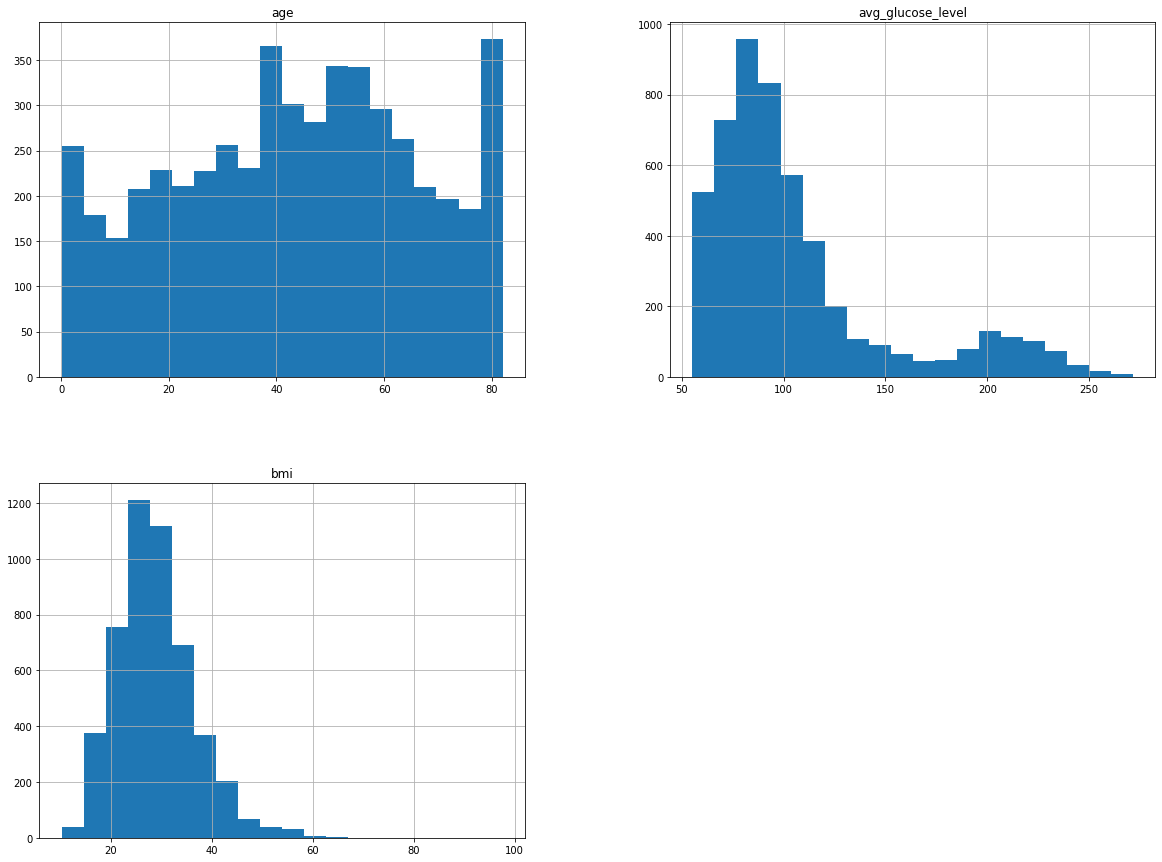

In [12]:
atttibutes_hist = df[["age", "avg_glucose_level", "bmi"]].hist(bins=20, figsize=(20,15))
atttibutes_hist

['Female', 'Male']
[2994, 2115]


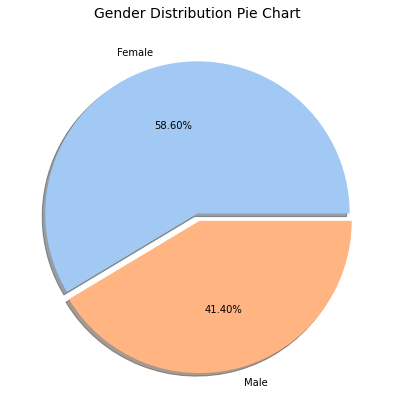

In [112]:
fig, ax = plt.subplots(1,1, figsize = (7,7))
colors = sns.color_palette('pastel')

labels = df['gender'].value_counts().index.tolist()[:2] #['Female', 'Male']
values = df['gender'].value_counts().tolist()[:2] #[2994, 2115]

ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0, 0.05])
ax.set_title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

In [83]:
labels = df['hypertension'].value_counts().index.tolist()[:2]
labels

[0, 1]

['Not hypertension', 'hypertension']
[4612, 498]


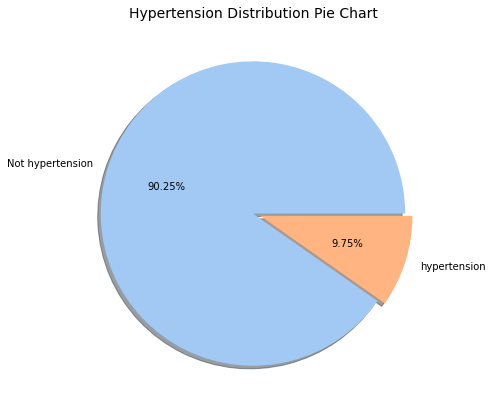

In [111]:
labels = ["Not hypertension", "hypertension"]
values = df['hypertension'].value_counts().tolist()[:2] #[4612, 498]

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0, 0.05])
ax.set_title("Hypertension Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

In [85]:
labels = df['heart_disease'].value_counts().index.tolist()[:2]
labels

[0, 1]

['No heart disease', 'heart disease']
[4834, 276]


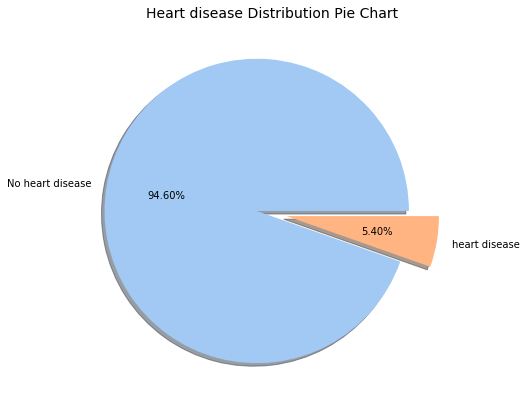

In [139]:
labels = ["No heart disease", "heart disease"]
values = df['heart_disease'].value_counts().tolist()[:2] 

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0.1, 0.1])
ax.set_title("Heart disease Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

In [81]:
labels = df['ever_married'].value_counts().index.tolist()[:2]
labels

['Yes', 'No']

['married', 'never married']
[3353, 1757]


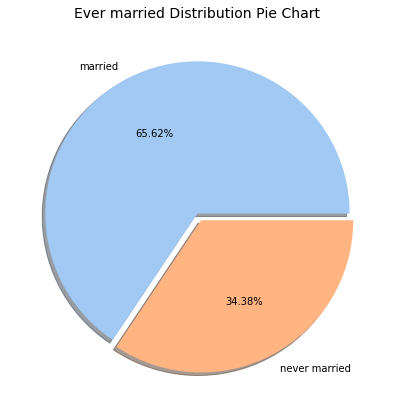

In [109]:
labels = ["married", "never married"]
values = df['ever_married'].value_counts().tolist()[:2] 

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0, 0.05])
ax.set_title("Ever married Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked']
[2925, 819, 687, 657, 22]


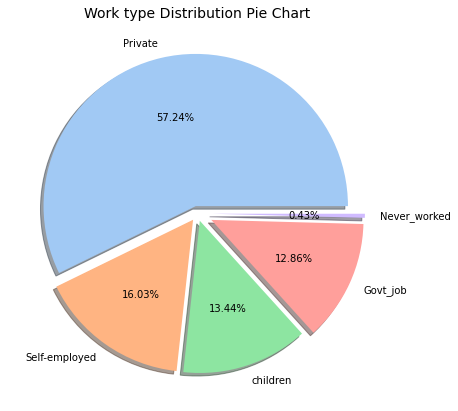

In [128]:
labels = df['work_type'].value_counts().index.tolist()
values = df['work_type'].value_counts().tolist()

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0.05,0.05,0.05,0.1,0.1])
ax.set_title("Work type Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

['Urban', 'Rural']
[2596, 2514]


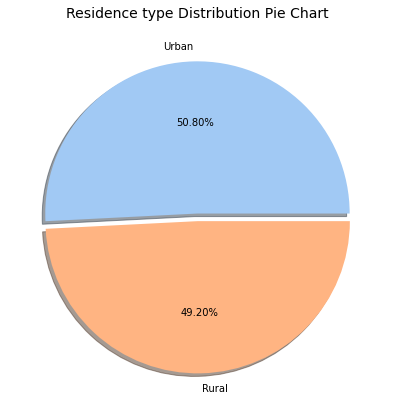

In [115]:
#Residence_type
labels = df['Residence_type'].value_counts().index.tolist()
values = df['Residence_type'].value_counts().tolist()

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0,0.05])
ax.set_title("Residence type Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

['never smoked', 'Unknown', 'formerly smoked', 'smokes']
[1892, 1544, 885, 789]


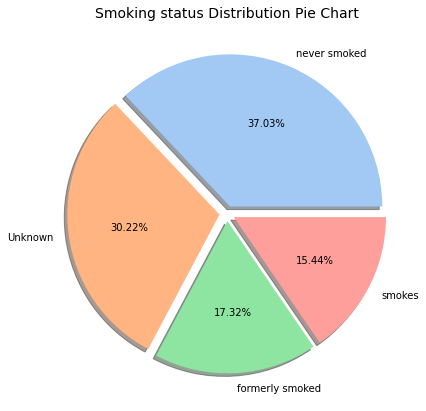

In [129]:
#smoking_status
labels = df['smoking_status'].value_counts().index.tolist()
values = df['smoking_status'].value_counts().tolist()

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0.05,0.05,0.05,0.05])
ax.set_title("Smoking status Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

In [140]:
labels = df['stroke'].value_counts().index.tolist()
labels

[0, 1]

['Not have stroke', 'Had stroke']
[4861, 249]


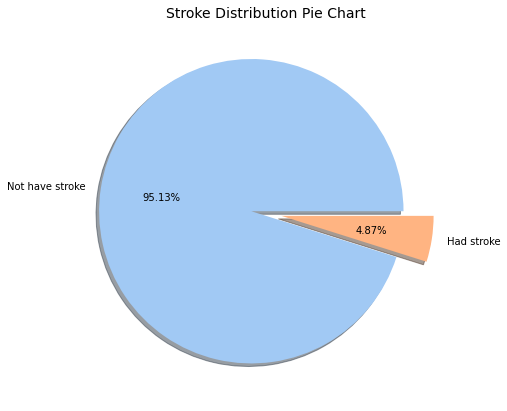

In [144]:
#stroke
labels = ['Not have stroke','Had stroke']
values = df['stroke'].value_counts().tolist()

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0.1,0.1])
ax.set_title("Stroke Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()